In [1]:
import os
import torch
import torchvision
from torch import nn
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision import transforms
from collections import OrderedDict
import datetime

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/erichansen/.conda/envs/pytorch/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# workdir = '/Users/erichansen/Desktop/Classes/9.520/project/'
workdir = './'

In [ ]:
all_df1 = helper.get_results_files(workdir + 'results/', '2022-12-09-04-19', '2022-12-09-04-38')

In [ ]:
sns.relplot(
    data=all_df[(all_df['model_strategy'] == 'CNN_layerwise') & (all_df['layer'] == all_df['layer'].max())],
    x='epoch',
    y='loss',
    hue='type',
    col='round',
    col_wrap=3
)sns.relplot(
    data=all_df[(all_df['model_strategy'] == 'CNN_layerwise') & (all_df['layer'] == all_df['layer'].max())],
    x='epoch',
    y='loss',
    hue='type',
    col='round',
    col_wrap=3
)
sns.relplot(
    data=all_df[(all_df['model_strategy'] == 'CNN_layerwise') & (all_df['layer'] == all_df['layer'].max())],
    x='epoch',
    y='loss',
    hue='type',
    col='round',
    col_wrap=3
)

sns.relplot(
    data=all_df[(all_df['model_strategy'] == 'MLP_layerwise') & (all_df['epoch'] == all_df['epoch'].max())],
    x='round',
    y='top1',
    hue='type',
    col='layer',
    col_wrap=3
)
sns.relplot(
    data=all_df[(all_df['model_strategy'] == 'CNN_layerwise') & (all_df['epoch'] == all_df['epoch'].max())],
    x='round',
    y='top1',
    hue='type',
    col='layer',
    col_wrap=3
)
sns.relplot(
    data=all_df[(all_df['epoch'] == all_df['epoch'].max())],
    x='round',
    y='top1',
    hue='type',
    col='model_strategy',
    col_wrap=3
)

sns.relplot(
    data=all_df[(all_df['epoch'] == all_df['epoch'].max()) & (all_df['layer'] == all_df['layer'].max())],
    x='round',
    y='loss',
    hue='type',
    col='model_strategy',
    col_wrap=3
)

sns.relplot(
    data=all_df[(all_df['epoch'] == all_df['epoch'].max()) & (all_df['layer'] == all_df['layer'].max())],
    x='round',
    y='top1',
    hue='type',
    col='model_strategy',
    col_wrap=3
)

In [ ]:
def return_final_epoch()

In [ ]:
def return_final_round()

# Read Inputs

In [20]:
def add_effective_epoch(df):
    df['effective_epoch'] = (df['round']) * df['max_epochs'] + df['epoch']
    
    return df

In [21]:
def read_results_df(filename):
    return add_effective_epoch(pd.read_csv(workdir + f'results/{filename}.csv'))

In [ ]:
2022-12-09-22-26_MLP_layerwise.csv
26 minutes ago567 B
2022-12-09-22-41_MLP_layerwise.csv
11 minutes ago10.1 kB
2022-12-09-22-44_MLP_backprop.csv

In [ ]:
# Experiment 1 - CIFAR 10
- '2022-12-10-18-02_MLP_layerwise'
- '2022-12-10-02-21_MLP_backprop'

# Experiment 1 - MNIST


# Experiment 2 - CIFAR 10


# Experiment 2 - MNIST


In [49]:
mlp_c1_layerwise_df = read_results_df('2022-12-10-18-02_MLP_layerwise')
# mlp_c2_layerwise_df = read_results_df('')
mlp_c1_backprop_df = read_results_df('2022-12-10-02-21_MLP_backprop')

## Plot Type 1: Accuracy/Loss over Effective Epochs by Experimenal Conditions

In [ ]:
# MLP_backprop, MLP_layerwise

In [40]:
all_layerwise_df = pd.concat([mlp_c1_layerwise_df, mlp_c2_layerwise_df])

NameError: name 'mlp_c2_layerwise_df' is not defined

In [52]:
compare_bp_df = pd.concat([mlp_c1_layerwise_df[mlp_c1_layerwise_df['layer'] == 2], mlp_c1_backprop_df])

In [ ]:
sns.relplot(
    data=all_layerwise_df,
    x='effective_epoch',
    y='top1',
    hue='condition',
    col='type'
)

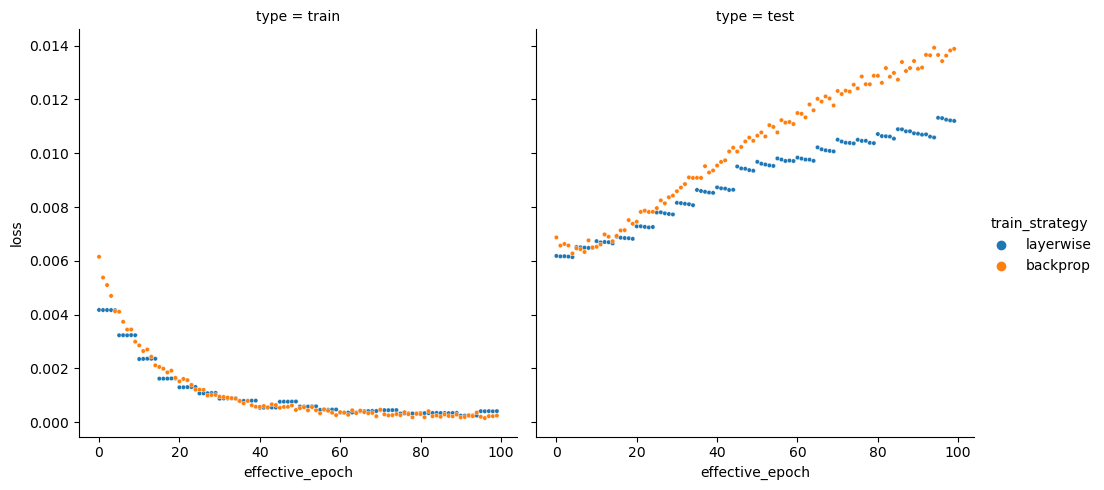

In [70]:
sns.relplot(
    data=compare_bp_df,
    x='effective_epoch',
    y='loss',
    hue='train_strategy',
    col='type',
    s=10
)

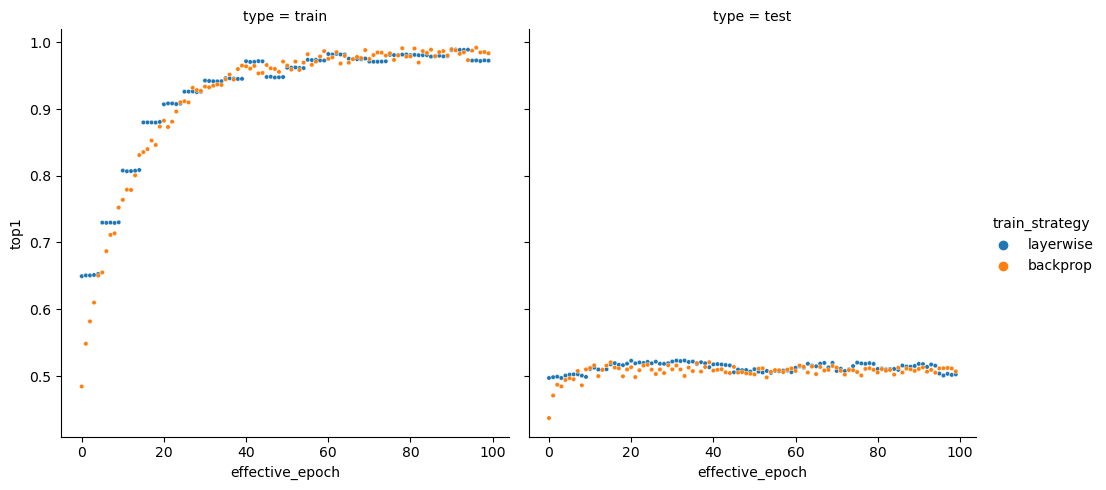

In [71]:
sns.relplot(
    data=compare_bp_df,
    x='effective_epoch',
    y='top1',
    hue='train_strategy',
    col='type',
    s=10
)

In [59]:
def compare_layer_improvement(df):
    df = df[df['epoch'] == df['epoch'].max()]
    
    df = df.sort_values(by=['round', 'layer'])
    
    type_df = df.groupby(by='type')
    df['layer_top1_imp'] = type_df['top1'].diff()
    df['layer_loss_imp'] = type_df['loss'].diff()
    
    sns.relplot(
        data=df,
        x='round',
        y='layer_top1_imp',
        col='type',
        hue='layer',
        palette='viridis',
        kind='line'
    )
    
    sns.relplot(
        data=df,
        x='round',
        y='layer_loss_imp',
        col='type',
        hue='layer',
        palette='viridis',
        kind='line'
    )
    
    return df

In [65]:
df[['effective_epoch', 'type', 'layer', 'layer_top1_imp', 'layer_loss_imp', 'loss', 'top1']].head(20)

,effective_epoch,type,layer,layer_top1_imp,layer_loss_imp,loss,top1
8,4,train,0,NaN,NaN,0.004176,0.65042
9,4,test,0,NaN,NaN,0.006229,0.49920
18,4,train,1,0.00068,-0.000007,0.004169,0.65110
19,4,test,1,-0.00380,-0.000041,0.006188,0.49540
28,4,train,2,0.00172,-0.000007,0.004162,0.65282
29,4,test,2,0.00530,-0.000051,0.006137,0.50070
38,9,train,0,0.07622,-0.000933,0.003228,0.72904
39,9,test,0,-0.00200,0.000455,0.006592,0.49870
48,9,train,1,0.00218,-0.000001,0.003227,0.73122
49,9,test,1,0.00260,-0.000080,0.006512,0.50130


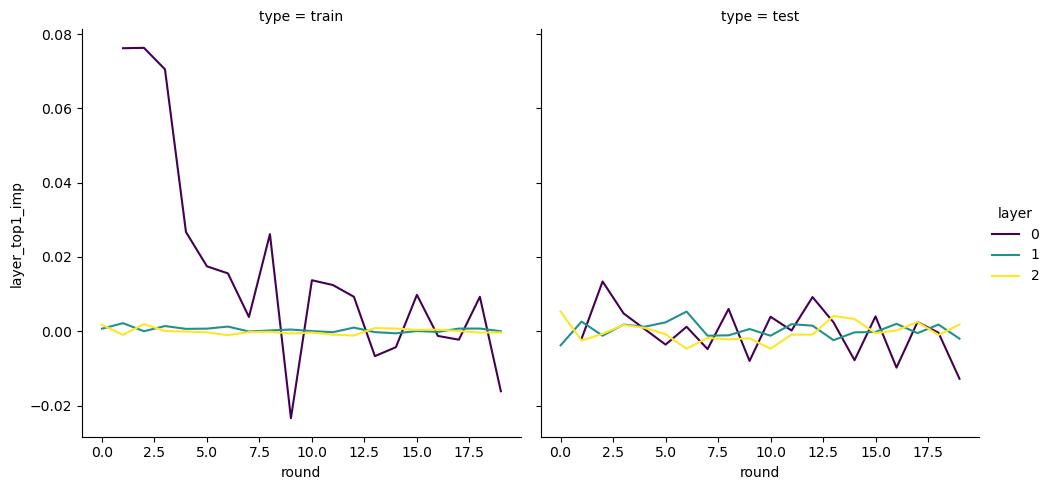

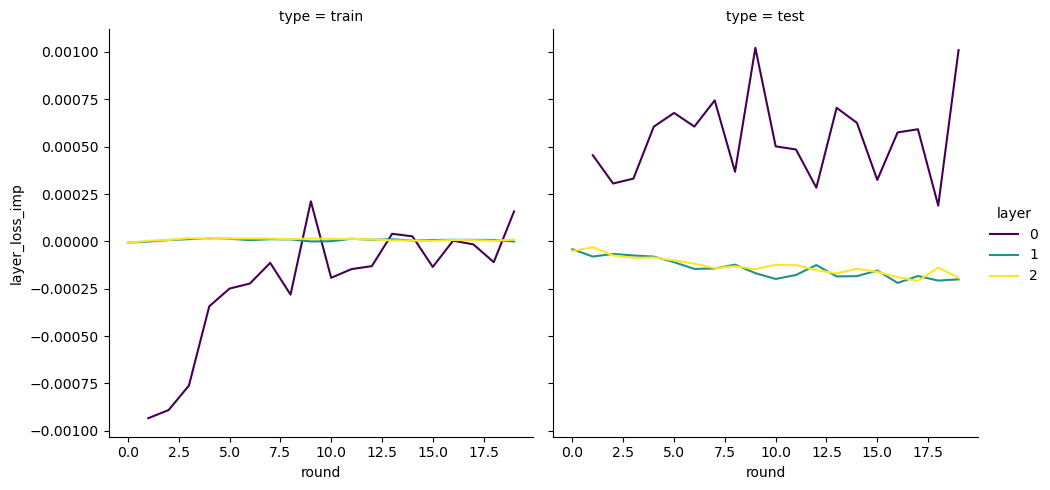

In [60]:
df = compare_layer_improvement(mlp_c1_layerwise_df)